# Plot spin-up: SST, SSS, total ocean temp, total kinetic energy

CM2-025, CM2-1, OM2-025, OM2-1

Variables extracted in 0_Calc_variables.ipynb

In [1]:
import intake
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client

client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41985,Workers: 28
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.19 GiB
Comm: tcp://127.0.0.1:44433,Total threads: 1
Dashboard: /proxy/42511/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:36747,


#### Define a few things first

In [3]:
# Path to data
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'
path_to_data_cz861 = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025_cz861/'

In [4]:
# Plotting info
ft_size = 12
plt.rcParams.update({'font.size': ft_size})
fig_path = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

In [5]:
# Define colours
CLEX_Red = '#DA1E48'
CLEX_Pink = '#F48580'
CLEX_SkyBlue = '#00BDF2'
CLEX_MidBlue = '#008DD0'
CLEX_CobaldBlue = '#0066B3'
CLEX_MidnightBlue = '#113559'
CLEX_Gray = '#4D4D47'

In [6]:
# Time period to be plotted
# First 500 yr of CM2 
start_time_CM2 = '0001-01-01'
end_time_CM2   = '0500-12-31'

# First 500 yr of OM2
start_time_CM2 = '1900-01-01'
end_time_CM2   = '2399-12-31'

In [7]:
cat = intake.open_esm_datastore(
    "/g/data/lg87/wgh581/datastore_ACCESS_CM2_025_cz861.json",
    columns_with_iterables=["variable"] # This is important
)

#### Import data

CM2-025

In [8]:
temp_CM2_025 = xr.open_dataarray(path_to_data_cz861 + 'temp_global_ave_monthly.nc').resample(time='YE').mean()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/core/indexing.py:516: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


In [9]:
ke_tot_CM2_025 = xr.open_dataarray(path_to_data_cz861 + 'ke_tot_monthly.nc').resample(time='YE').mean()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/core/indexing.py:516: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


In [10]:
SST_CM2_025 = xr.open_dataarray(path_to_data_cz861 + 'temp_surface_ave_annual.nc')#.mean('xt_ocean').mean('yt_ocean') - 273.15
SSS_CM2_025 = xr.open_dataarray(path_to_data_cz861 + 'salt_surface_ave_annual.nc')#.mean('xt_ocean').mean('yt_ocean')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/core/indexing.py:516: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data

CM2-1

In [11]:
SST_CM2_1    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/temp_surface_ave_annual_CM2_1.nc')
SSS_CM2_1    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/salt_surface_ave_annual_CM2_1.nc')
temp_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/temp_global_ave_annual_CM2_1.nc')
ke_tot_CM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/ke_tot_annual_CM2_1.nc')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/core/indexing.py:516: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data

OM2-025

In [12]:
SST_OM2_025    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/temp_surface_ave_annual_OM2_025.nc')
SSS_OM2_025    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/salt_surface_ave_annual_OM2_025.nc')
temp_OM2_025   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/temp_global_ave_annual_OM2_025.nc')
ke_tot_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/ke_tot_annual_OM2_025.nc')

OM2-1

In [13]:
SST_OM2_1    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/temp_surface_ave_annual_OM2_1.nc')
SSS_OM2_1    = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/salt_surface_ave_annual_OM2_1.nc')
temp_OM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/temp_global_ave_annual_OM2_1.nc')
ke_tot_OM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/ke_tot_annual_OM2_1.nc')

#### Plotting

In [14]:
time = np.arange(1, 501, 1)

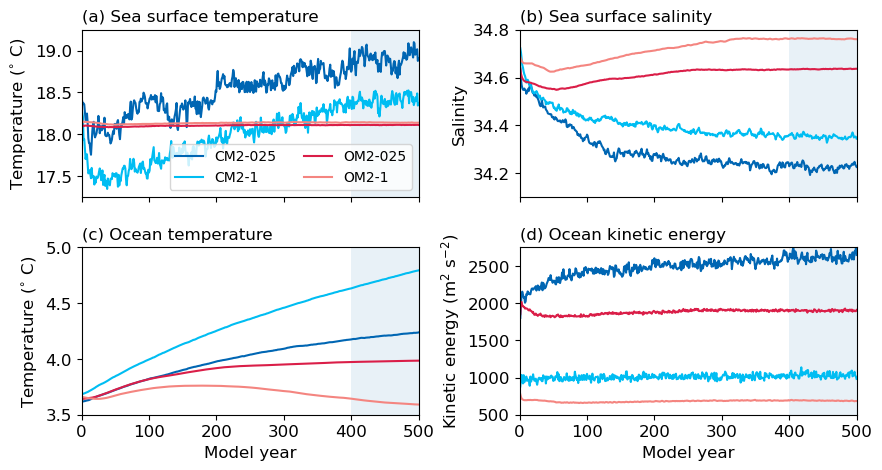

In [16]:
fig = plt.figure(figsize=(10,5))
gs  = gridspec.GridSpec(2, 2, width_ratios=[1, 1], hspace=0.3, wspace=0.3)

ax = fig.add_subplot(gs[0,0])
plt.plot(time, SST_CM2_025[0:500], label='CM2-025', color=CLEX_CobaldBlue)
plt.plot(time, SST_CM2_1[0:500], label='CM2-1', color=CLEX_SkyBlue)
plt.plot(time, SST_OM2_025[0:500], label='OM2-025', color=CLEX_Red)
plt.plot(time, SST_OM2_1[0:500], label='OM2-1', color=CLEX_Pink)
plt.legend(ncol=2, fontsize=ft_size-2)
plt.title('')
plt.title('(a) Sea surface temperature', loc='left', fontsize=ft_size)
plt.xlabel('')
plt.ylabel('Temperature ($^{\circ}$ C)')
plt.xlim(0, 500)
plt.ylim(17.25, 19.25)
plt.yticks(np.arange(17.5, 19.25, 0.5))
plt.tick_params(labelbottom=False)
# plt.axvline(400, linestyle='--', color='k')
plt.fill_between([400, 500], [17.25, 17.25], [19.25, 19.25], alpha=0.1)

ax = fig.add_subplot(gs[0,1])
plt.plot(time, SSS_CM2_025[0:500], label='CM2-025', color=CLEX_CobaldBlue)
plt.plot(time, SSS_CM2_1[0:500], label='CM2-1', color=CLEX_SkyBlue)
plt.plot(time, SSS_OM2_025[0:500], label='OM2-025', color=CLEX_Red)
plt.plot(time, SSS_OM2_1[0:500], label='OM2-1', color=CLEX_Pink)
plt.title('')
plt.title('(b) Sea surface salinity', loc='left', fontsize=ft_size)
plt.xlabel('')
plt.ylabel('Salinity')
plt.xlim(0, 500)
plt.ylim(34.1, 34.8)
plt.yticks(np.arange(34.2, 35, 0.2))
plt.tick_params(labelbottom=False)
plt.fill_between([400, 500], [34.1, 34.1], [34.8, 34.8], alpha=0.1)

ax = fig.add_subplot(gs[1,0])
plt.plot(time, temp_CM2_025[0:500], label='CM2-025', color=CLEX_CobaldBlue)
plt.plot(time, temp_CM2_1[0:500], label='CM2-1', color=CLEX_SkyBlue)
plt.plot(time, temp_OM2_025[0:500], label='OM2-025', color=CLEX_Red)
plt.plot(time, temp_OM2_1[0:500], label='OM2-1', color=CLEX_Pink)
plt.title('')
plt.title('(c) Ocean temperature', loc='left', fontsize=ft_size)
plt.xlabel('Model year')
plt.ylabel('Temperature ($^{\circ}$ C)')
plt.xlim(0, 500)
plt.ylim(3.5, 5)
plt.yticks(np.arange(3.5, 5.25, 0.5))
plt.fill_between([400, 500], [3.5, 3.5], [5, 5], alpha=0.1)

ax = fig.add_subplot(gs[1,1])
plt.plot(time, ke_tot_CM2_025[0:500], label='CM2-025', color=CLEX_CobaldBlue)
plt.plot(time, ke_tot_CM2_1[0:500], label='CM2-1', color=CLEX_SkyBlue)
plt.plot(time, ke_tot_OM2_025[0:500], label='OM2-025', color=CLEX_Red)
plt.plot(time, ke_tot_OM2_1[0:500], label='OM2-1', color=CLEX_Pink)
plt.title('')
plt.title('(d) Ocean kinetic energy', loc='left', fontsize=ft_size)
plt.xlabel('Model year')
plt.ylabel('Kinetic energy (m$^2$ s$^{-2}$)')
plt.xlim(0, 500)
plt.ylim(500, 2750)
plt.yticks(np.arange(500, 2750, 500))
plt.fill_between([400, 500], [500, 500], [2750, 2750], alpha=0.1);

save_flag = 1
if save_flag == 1:
    plt.savefig(fig_path + 'Fig1_spinup_cz861.png', dpi=300, bbox_inches='tight', facecolor='white');

Time-mean over last 100 years (shaded area):

In [28]:
print('')
print('CM2-025')
print('SST:', np.round(SST_CM2_025.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))
print('SSS:', np.round(SSS_CM2_025.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))
print('temp:', np.round(temp_CM2_025.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))
print('ke:', np.round(ke_tot_CM2_025.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))

print('')
print('CM2-1')
print('SST:', np.round(SST_CM2_1.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))
print('SSS:', np.round(SSS_CM2_1.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))
print('temp:', np.round(temp_CM2_1.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))
print('ke:', np.round(ke_tot_CM2_1.sel(time=slice('0401-01-01','0500-12-31')).mean().values,2))

print('')
print('OM2-025')
print('SST:', np.round(SST_OM2_025.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))
print('SSS:', np.round(SSS_OM2_025.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))
print('temp:', np.round(temp_OM2_025.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))
print('ke:', np.round(ke_tot_OM2_025.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))

print('')
print('OM2-1')
print('SST:', np.round(SST_OM2_1.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))
print('SSS:', np.round(SSS_OM2_1.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))
print('temp:', np.round(temp_OM2_1.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))
print('ke:', np.round(ke_tot_OM2_1.sel(time=slice('2301-01-01','2400-12-31')).mean().values,2))


CM2-025
SST: 18.9
SSS: 34.23
temp: 4.21
ke: 2617.24

CM2-1
SST: 18.41
SSS: 34.35
temp: 4.72
ke: 1033.54

OM2-025
SST: 18.11
SSS: 34.64
temp: 3.98
ke: 1899.51

OM2-1
SST: 18.14
SSS: 34.76
temp: 3.61
ke: 689.48
